# Making predictions and decisions with medical trial data

We have data for 6 studies that have been done on the effect of *specific allergen immunotherapy* (SIT) on eczema and the following success rates have been observed. In each of the trials, the investigator rated whether each patient's condition improved or not.

This data set is from the [Cochrane Database of Systematic Reviews](http://www.cochranelibrary.com/) article cited below, available for free [here](http://onlinelibrary.wiley.com/doi/10.1002/14651858.CD008774.pub2/full). The Cochrane Database is a great resource for high quality data on all sorts of medical trials.

> Tam H., Calderon M.A., Manikam L., Nankervis H., García Núñez I., Williams H.C., Durham S., Boyle R.J. (2016). Specific allergen immunotherapy for the treatment of atopic eczema. *Cochrane Database of Systematic Reviews, Issue 2*. Art. No.: CD008774. DOI: 10.1002/14651858.CD008774.pub2.

| Study          | Improved | Not improved |
|:-------------- | --------:| ------------:|
| Di Rienzo 2014 | 20       | 3            |
| Galli 1994     | 10       | 6            |
| Kaufman 1974   | 13       | 3            |
| Qin 2014       | 35       | 10           |
| Sanchez 2012   | 22       | 9            |
| Silny 2006     | 7        | 3            |
| **Totals**     | **107**  | **34**       |

## Task 1: Modeling
**Build a statistical model for this data set.** As your data, use the total number of patients improved (107) and not improved (34).

**Steps in the modeling process:**
1. Choose and motivate for an appropriate likelihood function for this type of data.
    1. Make sure the support of your likelihood function matches the type of data we are working with.
    2. Describe the unobserved parameter(s) of your model, and describe how it/they can be interpreted.
2. Use a conjugate prior distribution for your likelihood function.
    1. Select appropriate values for the prior hyperparameters and motivate your choice.
    2. Visualize your prior distribution.
3. Compute and visualize the posterior distribution over the unobserved parameter(s) of your model. Also describe what the posterior tells you about the parameter(s).

Feel free to discuss this task with other students in the course, or attempt it on your own if you prefer. Discussing your modeling ideas with other students is a useful way to get feedback on your assumptions.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy

The likelihood function should be a binomial distribution because we are counting the number of success and failure, given the general success rate. Question: so I thought the likelihood is a distribution over the parameters, not over the data, how can it be binomial? (as stated in the first video, and as for the conjugate prior to work).
Unobserved parameters: 

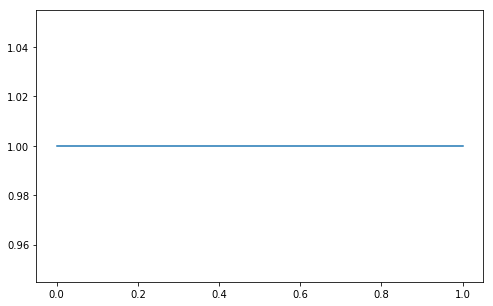

In [9]:
# prior - a uniform beta distrbution
X = 107
N = 141
rate = np.linspace(0, 1, 500)
a_0 = 1
b_0 = 1
prior = sts.beta.pdf(rate, a_0, b_0)
plt.figure(figsize = (8, 5))
plt.plot(rate, prior)
plt.show()

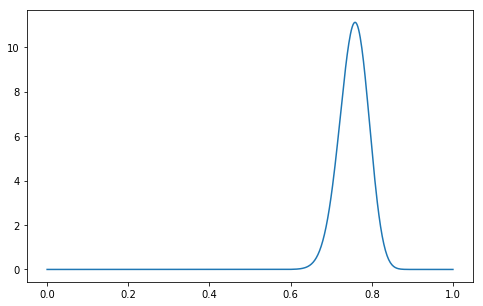

In [12]:
# posterior - beta distribution
a_post = a_0 + X
b_post = b_0 + N - X
posterior = sts.beta.pdf(rate, a_post, b_post)
plt.figure(figsize = (8, 5))
plt.plot(rate, posterior)
plt.show()

## Task 2: Questions, predictions, and decisions
1. Posterior predictive distribution: Use your model to predict how many patients would improve if we treated 100 new eczema patients using SIT. Express your answer as a probability distribution over the number of patients improved.
2. Use your posterior to answer these questions:
    1. What is the probability that at least two thirds of eczema patients get better with SIT?
    2. What is the probability that at least 75% of eczema patients get better with SIT?
3. Use your model to decide whether the treatment works or not. Motivate your answer.

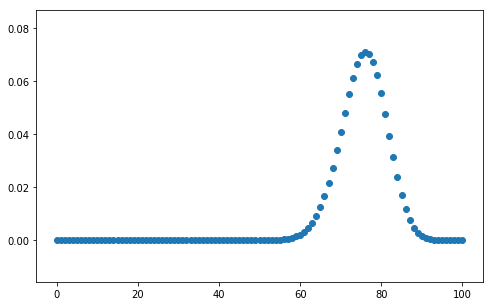

In [15]:
# posterior predictive distribution
def post_predict(rate, x):
    return (sts.binom.pmf(x, 100, rate)*sts.beta.pdf(rate, a_post, b_post))
def post_predict_result(rate, x):
    return scipy.integrate.quad(post_predict, 0, 1, (x))[0]
post_predict_ls = []
for x in range(101):
    post_predict_ls.append(post_predict_result(rate, x))
# print(post_predict_ls)
plt.figure(figsize=(8, 5))
plt.scatter(range(101), post_predict_ls)
plt.show()

In [22]:
def posterior_func(rate):
    return sts.beta.pdf(rate, a_post, b_post)
print(scipy.integrate.quad(posterior_func, 2/3, 1)[0])
print(scipy.integrate.quad(posterior_func, 3/4, 1)[0])

0.9902521886495702
0.5706496661069894
